In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('Documents/Go Data Science/telecom_churn.csv')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по одному
### 1.1 Количественные 

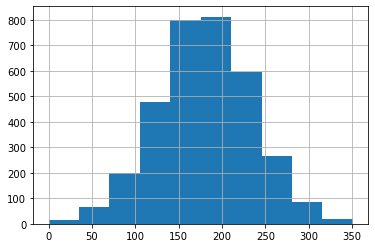

In [ ]:
df['Total day minutes'].hist();

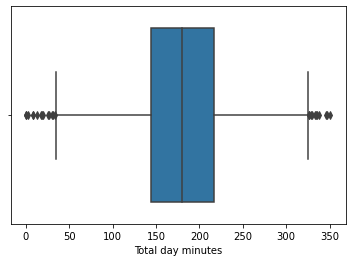

In [ ]:
sns.boxplot(df['Total day minutes']);

### 1.2 Категориальные 

In [ ]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OH     78
Name: State, dtype: int64

In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

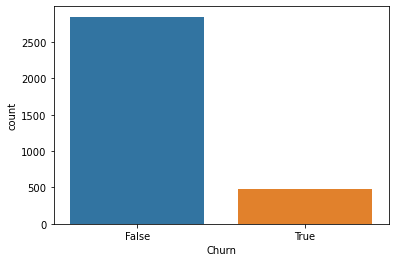

In [ ]:
sns.countplot(df['Churn']);

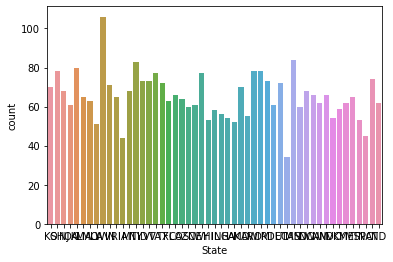

In [ ]:
sns.countplot(df['State']);

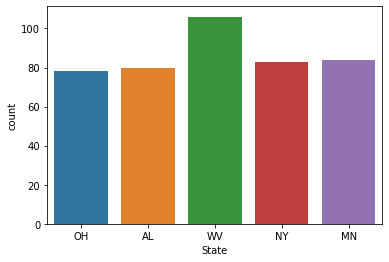

In [ ]:
sns.countplot(df[df['State'].\
                 isin(df['State'].value_counts().head().index)]['State']);

# Взаимодействия 
### 2.1 Колич-колич.

In [ ]:
feat = [f for f in df.columns if 'charge' in f]

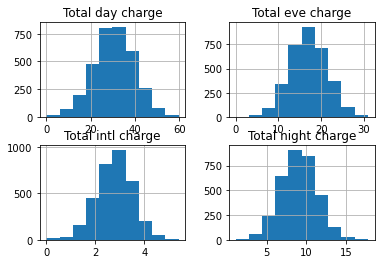

In [ ]:
df[feat].hist();

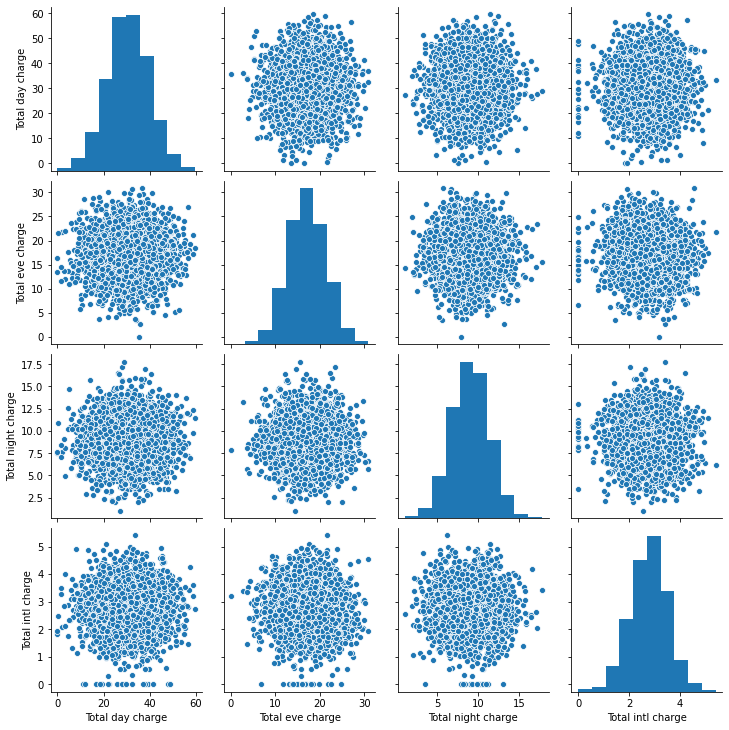

In [ ]:
sns.pairplot(df[feat]);

In [ ]:
df[df['Churn']].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


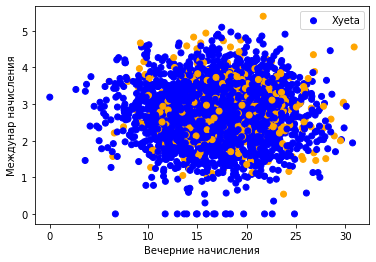

In [ ]:
plt.scatter(df['Total eve charge'],df['Total intl charge'],
           color=df['Churn'].map({False: 'blue',True: 'orange'}),
           label='Xyeta');
plt.xlabel('Вечерние начисления');
plt.ylabel('Междунар начисления');
plt.legend();

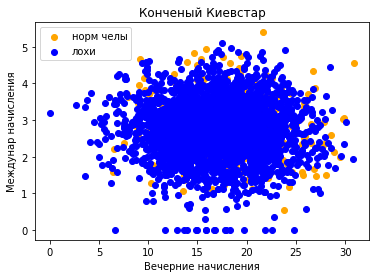

In [ ]:
plt.scatter(df[df['Churn']]['Total eve charge'],
            df[df['Churn']]['Total intl charge'],
           color='orange', label='норм челы');
plt.scatter(df[-df['Churn']]['Total eve charge'],
            df[-df['Churn']]['Total intl charge'],
           color='blue', label='лохи');
plt.xlabel('Вечерние начисления');
plt.ylabel('Междунар начисления');
plt.title('Конченый Киевстар');
plt.legend();

In [ ]:
df['Churn'].map({False: 'blue',True: 'orange'}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

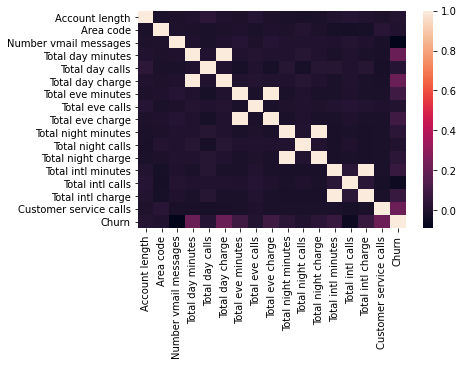

In [ ]:
sns.heatmap(df.corr());

# 2.2 Количест-катег + колич-бинар


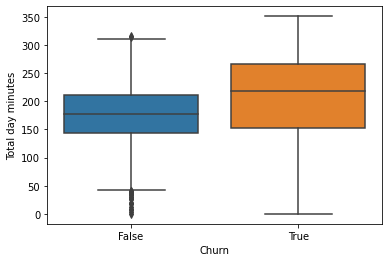

In [ ]:
sns.boxplot(x="Churn",y="Total day minutes",data=df);

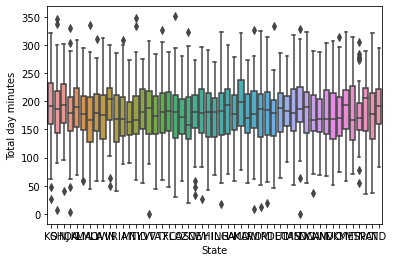

In [ ]:
sns.boxplot(x="State",y="Total day minutes",data=df);

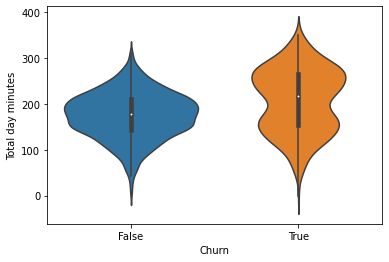

In [ ]:
sns.violinplot(x="Churn",y="Total day minutes",data=df);

In [ ]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

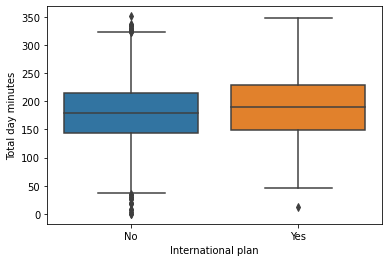

In [ ]:
sns.boxplot(x="International plan",y="Total day minutes",data=df);

# 2.3 Категор-категор

In [ ]:
pd.crosstab(df['Churn'],df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


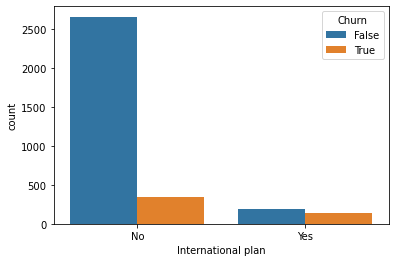

In [ ]:
sns.countplot(x='International plan',hue = 'Churn',data = df);

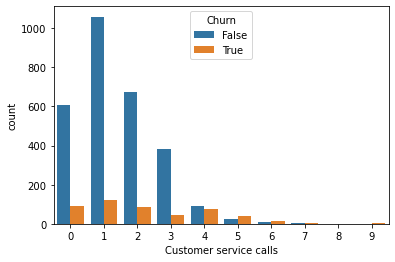

In [ ]:
sns.countplot(x='Customer service calls',hue = 'Churn',data = df);

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(random_state=0)

In [ ]:
df2 = df.drop('State',axis=1)

In [ ]:
df2['International plan'] = df2['International plan'].map({'Yes': 1,
                                                           'No': 0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1,
                                                           'No': 0})

In [ ]:
%%time
tsne.fit(df2)

Wall time: 41.6 s


TSNE(random_state=0)

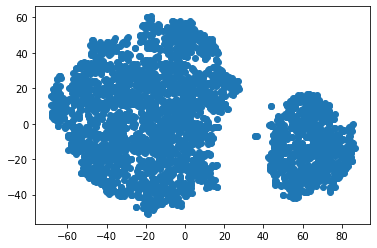

In [ ]:
plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1]);

In [ ]:
df2.shape

(3333, 19)

In [ ]:
tsne.embedding_[df2['Churn'].values,0].shape

(483,)

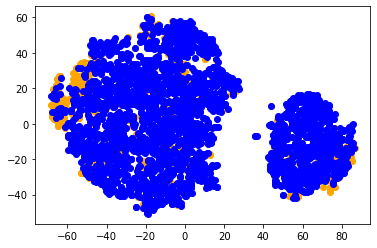

In [ ]:
plt.scatter(tsne.embedding_[df2['Churn'].values,0],
            tsne.embedding_[df2['Churn'].values,1],color='orange');
plt.scatter(tsne.embedding_[~df2['Churn'].values,0],
            tsne.embedding_[~df2['Churn'].values,1],color='blue');